This is a Divvy Bike (bike share) data set from Chicago. It is downloaded from [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Divvy-Trips/fg6s-gzvg/data). 

The csv in the data folder has been filtered to look at only 1 pickup station: Clark and Lake. That is a busy intersection in the Loop.  

In [227]:
# Import the dataset

df = None

In [228]:
#__SOLUTION__
# Raw Dataset
import pandas as pd
df = pd.read_csv('data/Divvy_Trips.csv')
df.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,GENDER,BIRTH YEAR,FROM LATITUDE,FROM LONGITUDE,FROM LOCATION,TO LATITUDE,TO LONGITUDE,TO LOCATION
0,4905583,04/18/2015 01:00:00 PM,04/18/2015 01:04:00 PM,3225,277,38,Clark St & Lake St,286,Franklin St & Quincy St,Subscriber,Male,1989.0,41.886021,-87.630876,POINT (-87.630876 41.886021),41.878724,-87.634793,POINT (-87.634793 41.878724)
1,4905756,04/18/2015 01:08:00 PM,04/18/2015 01:16:00 PM,3224,454,38,Clark St & Lake St,26,McClurg Ct & Illinois St,Subscriber,Male,1986.0,41.886021,-87.630876,POINT (-87.630876 41.886021),41.891020,-87.617300,POINT (-87.6173 41.89102)
2,4906415,04/18/2015 01:48:00 PM,04/18/2015 02:45:00 PM,3226,3415,38,Clark St & Lake St,255,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,41.886021,-87.630876,POINT (-87.630876 41.886021),41.867888,-87.623041,POINT (-87.623041 41.867888)
3,4906418,04/18/2015 01:48:00 PM,04/18/2015 02:45:00 PM,3223,3398,38,Clark St & Lake St,255,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,41.886021,-87.630876,POINT (-87.630876 41.886021),41.867888,-87.623041,POINT (-87.623041 41.867888)
4,4908035,04/18/2015 03:25:00 PM,04/18/2015 03:38:00 PM,2893,793,38,Clark St & Lake St,86,Eckhart Park,Subscriber,Female,1981.0,41.886021,-87.630876,POINT (-87.630876 41.886021),41.896373,-87.660984,POINT (-87.660984 41.896373)


We will be interested in the number of Divvy rentals over any given **week** at the Clark and Lake pickup dock.  

In order to begin inspecting the data across different time intervals, we need to give our dataset a datetime index.

In [229]:
# Create datetime index based on the start time


In [230]:
#__SOLUTION__
# Create datetime index based on the start time

df['START TIME'] = pd.to_datetime(df['START TIME'])
df.set_index(df['START TIME'], inplace=True)

Now that we have a datatime index, we can resample to a time frame of our choosing.

We are going from a smaller unit of time to a larger unit, so we will downsample.  With any resampling technique, we need to specify an aggregate function. In this case, we want to count the number of rides per hour.

In [231]:
# Downsample to the week and count the number of rides


In [232]:
#__SOLUTION__
# Downsample to the hour and count the number of rides
df_week = df.resample('W').count()['TRIP ID']
df_week

START TIME
2015-04-19     24
2015-04-26    106
2015-05-03    182
2015-05-10    160
2015-05-17    182
             ... 
2019-12-08    265
2019-12-15    200
2019-12-22    178
2019-12-29    119
2020-01-05     32
Freq: W-SUN, Name: TRIP ID, Length: 247, dtype: int64

Before we start looking at patterns in the data, perform a train test split.  We can't do it like we usually do. The sklearn version we use randomly picks points to assign to each set.  With time series data, we have to preserve the order, since the models depend on prior days.

We will slit of the last 52 weeks, 1 year, for our test set.

In [246]:
# Split the data so that 52 weeks are in the test set

In [247]:
#__SOLUTION__
# Train test split
train = df_week[:-52]
test = df_week[-52:]


<AxesSubplot:xlabel='START TIME'>

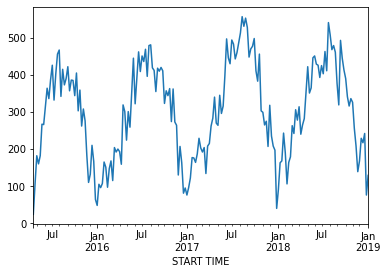

In [248]:
# Plot the training data
train.plot()

Describe the seasonality you see in the plot above.

==SOLUTION==
There is a repeating pattern that has a period of 1 year.  There are the lowest bike rental counts in the winter, most in the summer.

It is harder to see if there is an overall upward or downard trend. To investigate trend, let's look at the rolling mean across a year.

In [256]:
# Plot the rolling mean with a window of a year

<AxesSubplot:xlabel='START TIME'>

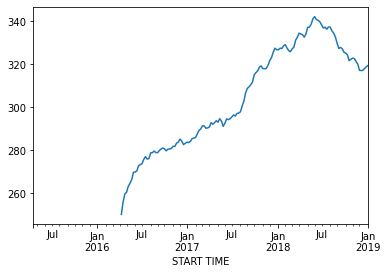

In [257]:
#__SOLUTION__
train.rolling(52).mean().plot()

That clearly visualizes an upward trend in our data, especially towards the first half of our dataset.

One way to remove trend this trend from the data is differencing.  A first order difference with a period of 1 (the default), will leave us with a timeseries composed of the change of rentals from 1 week to the next.

In [252]:
# Apply a 1st order difference to the time series and plot the rolling mean

<AxesSubplot:xlabel='START TIME'>

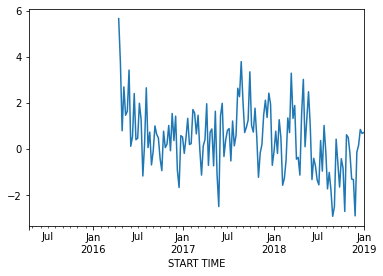

In [253]:
#__SOLUTION__
train.diff().rolling(52).mean().plot()


The trend is much less pronounced, but still looks to be sloping downwards. Let's see if a second order difference stabilizes it further.

In [254]:
# Apply a 2nd order difference: i.e. difference the difference, and plot the rolling mean.

<AxesSubplot:xlabel='START TIME'>

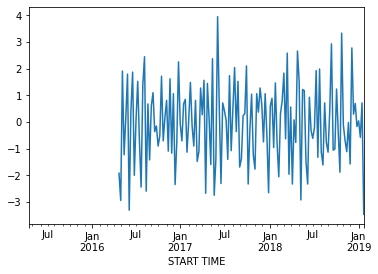

In [255]:
train_week.diff().diff().rolling(52).mean().plot()


The above eda gives us some clues about how to go about choosing the order in our SARIMAX models.  
The first choice of order will be the non-seasonal order. `p,d,q`. You can remember what those letters stand for by thinking AR=p, d=difference, MA=q.   The letters of the acronym aligns with the letters in the order argument.

In [ ]:
# Fit a SARIMAX model on the trian set with a first order difference.

In [221]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sm = SARIMAX(<your_code_here>).fit()


In [262]:
#__SOLUTION__
sm = SARIMAX(train, order=[0,1,0]).fit()


In [295]:
# Create a set of predictions for the train data (just use predict)

In [296]:
#__SOLUTION__
sm.predict()

START TIME
2015-04-19      0.0
2015-04-26     24.0
2015-05-03    106.0
2015-05-10    182.0
2015-05-17    160.0
              ...  
2018-12-09    168.0
2018-12-16    229.0
2018-12-23    217.0
2018-12-30    242.0
2019-01-06     76.0
Freq: W-SUN, Name: predicted_mean, Length: 195, dtype: float64

In [297]:
# Calculate the training root mean squared error (same syntax as a linear regression prediction)

In [298]:
#__SOLUTION__
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(train, sm.predict(), squared=False)
rmse

59.9824333258689

Next, calculate the test rmse.  To do this, you have to pass in the date of the first test element and the last test element as arguments.

In [300]:
#__SOLUTION__
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, sm.predict(test.index[0], test.index[-1]), squared=False)
rmse

218.70915003193696

The function below will print out train and test scores with a given set of orders.  

In [303]:
def print_ts_metrics(endog=train, test=test, order=[0,0,0], seasonal_order=[0,0,0,0]):
    
    '''
    Print out RMSE for a given set of orders (seasonal and non-seasonal)
    
    Return the model fit on the training set.
    '''
    
    sm = SARIMAX(endog, order=order, seasonal_order=seasonal_order).fit()
    
    print(mean_squared_error(endog, 
                             sm.predict(endog.index[0], endog.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    
    print(mean_squared_error(test, 
                             sm.predict(test.index[0], test.index[-1], 
                                        typ='levels'), 
                                        squared=False))
    return sm



The function below will plot the test predictions along with the true test values.

In [304]:
def plot_predictions(test=test, sm=sm):
    
    '''
    Pass a test set, as well as a model fit to the training set 
    to this function, and plot the test predictions against
    the true test values
    '''
    
    sm.predict(test.index[0], test.index[-1], typ='levels').plot()
    test.plot()
    

Try out a few non-seasonal order combinations and consider the effect on the test rmse.

In [ ]:
# set print_ts_metrics equal to model, then feed that model to plot_predictions
model = None
plot_predictions(test, model)

57.415975890558435
221.23405768411936


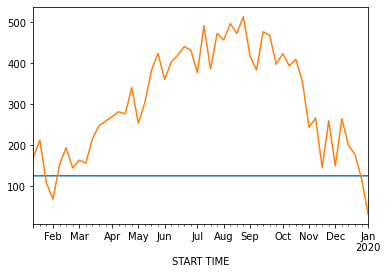

In [309]:
#__SOLUTION__
model = print_ts_metrics(train, test, [1,1,1])
plot_predictions(test, model)

55.17796571359788
257.77450434757844


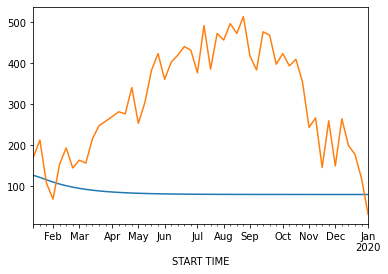

In [320]:
#__SOLUTION__
model = print_ts_metrics(train, test, [2,1,2])
plot_predictions(test, model)


The models make predictions, and different non-seasonal orders affect the rmse on the test set.  But the predictions certainly leave something to be desired.

From our eda above, we know that the data has seasonality.  We can account for this using the seasonal_order parameter.  The first step in generating better predictions is to choose the correct period.  The seasonal_order list should have for elements: P,D,Q,period (in that order).

Take the best parameters from above, then add to it a 1st order seasonal difference that makes sense with the eda.

64.14226324609506
59.16560214343101


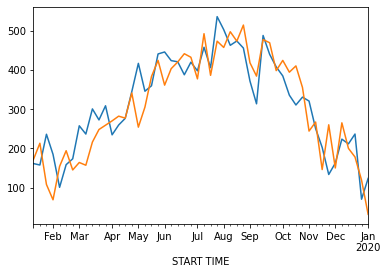

In [327]:
#__SOLUTION__
model = print_ts_metrics( train, test, [2,1,1],[0,1,0,52])
plot_predictions(test, model)
